In [53]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [54]:
# Read a Dividend CSV file into a dataframe
dfStockPrices = pd.read_csv('data/stocks_latest/stock_prices_latest.csv')
#dfStockPrices
dfEarning = pd.read_csv('data/stocks_latest/earnings_latest.csv')
#dfEarning

In [55]:
filtertSockPrices = ((dfStockPrices['date']> '2000-01-01') & (dfStockPrices['symbol'] == 'STOR'))
dfStockPrices = dfStockPrices[filtertSockPrices].sort_values('date', ascending = False)
#dfStockPrices
filtertEarning = ((dfEarning['date']> '2000-01-01') & (dfEarning['symbol'] == 'STOR'))
dfEarning = dfEarning[filtertEarning].sort_values('date', ascending = False)
dfEarning['eps'] = dfEarning['eps'].fillna(0.01)
dfEarning['eps_est'] = dfEarning['eps_est'].fillna(0.01)
dfEarning['eps'] = dfEarning['eps'].astype(float)
dfEarning['eps_est'] = dfEarning['eps_est'].astype(float)
#dfEarning

In [56]:
dfMerge = pd.merge(dfEarning, dfStockPrices, how='left', on=['date'])
dfMerge = pd.DataFrame([dfMerge['date'], dfMerge['eps'], dfMerge['eps_est'], dfMerge['close_adjusted']]).transpose()
#dfMerge['PE'] = dfMerge.apply(lambda x: dfMerge['close_adjusted'] if dfMerge['eps'] == 0 else dfMerge['close_adjusted']/dfMerge['eps'])
#dfMerge['p/e'] = np.where(dfMerge['eps'] < 1, dfMerge['eps'], dfMerge['close_adjusted']/dfMerge['eps'])
dfMerge

,date,eps,eps_est,close_adjusted
0,2020-02-20,0.25,0.236,37.63
1,2019-10-31,0.48,0.233,40.5
2,2019-08-01,0.3,0.227,34.2
3,2019-05-02,0.2,0.23,33.43
4,2019-02-21,0.26,0.218,32.49
5,2018-11-01,0.26,0.46,28.8466
6,2018-08-02,0.31,0.44,27.1159
7,2018-05-03,0.26,0.43,25.1
8,2018-02-22,0.21,0.41,23.73
9,2017-11-02,0.15,0.39,24.9331


In [57]:
plt.style.use('seaborn')
len(dfEarning.index)
plt.figure(figsize=(200,100))

<Figure size 14400x7200 with 0 Axes>

<Figure size 14400x7200 with 0 Axes>

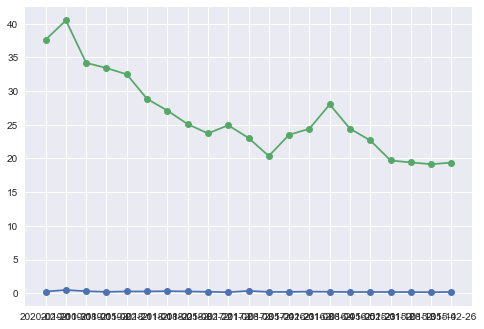

In [58]:
plt.plot_date(dfMerge['date'], dfMerge['eps'], linestyle='solid')
plt.plot_date(dfMerge['date'], dfMerge['close_adjusted'], linestyle='solid')